# EECS 531: Computer Vision Assignment 2
**David Fan**

3/16/18

# Exercise 2

## Problem Description
In this exercise I will construct both a low-pass and a high-pass image filter by zeroing different ranges of the DCT coefficients.

To do this I will read an image in and convert it to greyscale, then I will apply the dct transform onto the image. Depending on whether I'm creating the low-pass or the high-pass filter I will zero out a certain range from the image and apply the inverse dct transform to recover the image.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from skimage import io

In [38]:
# Import the image
original_image = io.imread('images/turtle.jpeg', as_grey=True)

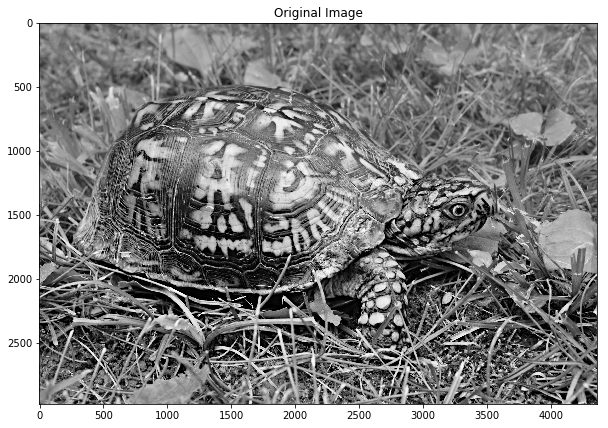

In [39]:
fig, ax = plt.subplots(figsize=((10,10)))
ax.set_title('Original Image')
ax.imshow(original_image, cmap='gray');

In [106]:
transformed_image = dct(dct(original_image.T, norm='ortho').T, norm='ortho')
print(transformed_image)

[[ 1.59894159e+03 -1.32590137e+01 -2.72153958e+01 ...  1.90781187e-02
   3.45361663e-02  1.82915686e-01]
 [ 1.47100533e+02  3.87143896e+00 -4.29739386e+00 ...  9.20815770e-03
   1.89829392e-02 -2.86936767e-02]
 [ 1.97862526e+01  4.33211063e+01  1.19747406e+01 ...  1.94662761e-02
  -1.85983580e-02 -5.87390623e-02]
 ...
 [-1.08011644e-01 -2.11484025e-03  3.02740303e-02 ... -7.86319964e-03
  -1.90035467e-02  3.69773248e-03]
 [ 5.13069609e-02  7.26072101e-03 -6.59813523e-03 ... -5.32831404e-03
   4.19807139e-03 -1.05551845e-02]
 [-1.13479186e-01 -1.40221554e-02 -2.10258727e-02 ...  1.59097292e-02
  -1.27533941e-03 -2.27548160e-02]]


/Users/david/anaconda3/envs/531/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


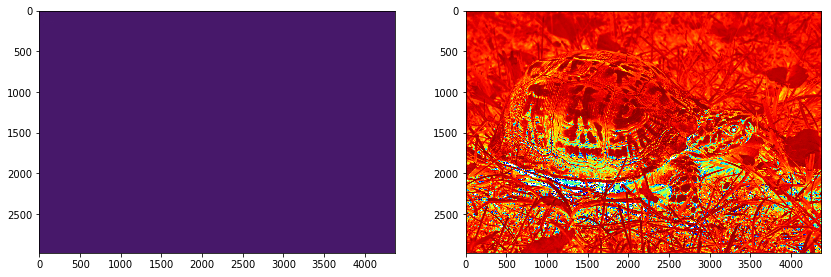

In [107]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,14))
ax1.imshow(transformed_image)
ax2.imshow(np.log(np.abs(original_image)), cmap='jet');  

In [140]:
low_pass_transform = np.copy(transformed_image)
low_pass_transform[100:, 100:] = 0
low_pass_image = idct(idct(low_pass_transform.T, norm='ortho').T, norm='ortho')
low_diffI = np.abs(original_image - low_pass_image)

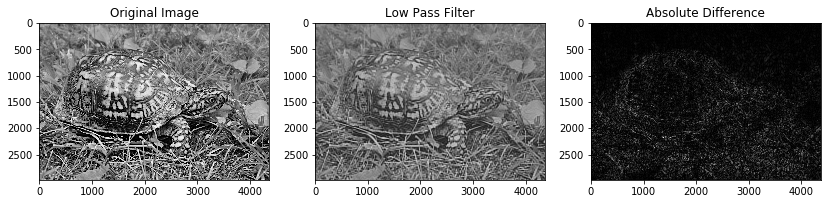

In [141]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,14))
ax1.set_title('Original Image')
ax1.imshow(original_image, cmap='gray')
ax2.set_title('Low Pass Filter')
ax2.imshow(low_pass_image, cmap='gray')
ax3.set_title('Absolute Difference')
ax3.imshow(low_diffI, cmap='gray');

In [137]:
high_pass_transform = np.copy(transformed_image)
high_pass_transform[0:15, 0:15] = 0
high_pass_image = idct(idct(high_pass_transform.T, norm='ortho').T, norm='ortho')
high_diffI = np.abs(original_image - high_pass_image)

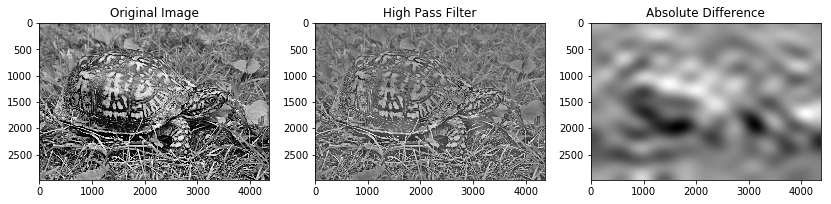

In [138]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,14))
ax1.set_title('Original Image')
ax1.imshow(original_image, cmap='gray')
ax2.set_title('High Pass Filter')
ax2.imshow(high_pass_image, cmap='gray')
ax3.set_title('Absolute Difference')
ax3.imshow(high_diffI, cmap='gray');

## Conclusions

What we have done in this notebook shows that images can be represented, not by pixel intensity values, but by DCT coefficients. This allows us to only save the small relevant portion of coefficients that are needed to reconstruct the image with "acceptable" loss leading to effective compression.